# Maximum Principal Stress Criterion

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

<img src="far field stress.png" width="700"/>

The theory of Maximum Principal Stress was first introduced by Erdogan and Sih (1963). According to this theory, crack growth will take place for an in-plane mixed mode along the direction for which the initial normal stress across the possible crack path is tensile, principal and maximum \cite{bazant1997fracture}. The theory evaluates the stresses in the vicinity of crack tip based on the dependence on the angle of the initial and current crack propagation and the far field stresses. The external stresses at a point in the finite element and along the crack are shown in  figure and the far field stress profile at a point in a finite element is represented in equation.
\begin{align}
\bar{\sigma}_{ij} = 
\left[
\begin{array}{cc}
\bar{\sigma}_{x} & \bar{\sigma}_{xy} \\
\bar{\sigma}_{xy} & \bar{\sigma}_{y}
\end{array}
\right] =
\left[
\begin{array}{cc}
(1 - \eta)\bar{\sigma} & \eta \bar{\sigma} \\
\eta \bar{\sigma} & 0
\end{array}
\right] 
\label{eq:sigmaxz}
\end{align}
Here, $\bar{\sigma}_x = (1 - \eta)\,\bar{\sigma}_x, \bar{\sigma}_{xy} = \eta\,\bar{\sigma}_x, \bar{\sigma}_y = 0$ depicts the horizontal, shear and vertical far field stresses at a point whereas $\eta$ represents the shear co-efficient whose value range from $0$ to $1$ acting as a switch to constitute the cases from pure tension to pure shear. Figure gives a visual representation of a condition for shear zones i.e. $\bar{\sigma}_y = 0$. Furthermore, it also shows an assumed orientation of an initial crack making an angle $\beta$ with respect to the vertical axis. Moreover, these assumptions will act as boundary conditions for the proposed model calculating orientation of the crack.

In [20]:
r = sp.Symbol('r', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
eta =  sp.Symbol(r'\eta', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
f = sp.Symbol(r'f', nonnegative = True)
eta

## Stress Intensity Factors
As far field stresses show the stress profile at a point in the element but we need to transform it with respect to the initial crack as we are solely concerned to evaluate the stresses along the rupture and the stress field of the propagating fracture. In order to obtain the profile along the crack, transformation is required which is shown as:
\begin{align}
R^{\beta}_{kl} = 
\left[
\begin{array}{cc}
\cos \beta & -\sin \beta \\
\sin \beta & \cos \beta
\end{array}
\right]
\label{eq:R}
\end{align}
\begin{align}
\bar{\sigma}^{\beta}_{kl} = 
R^{\beta}_{ki} \bar{\sigma}_{ij} R^{\beta}_{jl}
\label{eq:sigmat}
\end{align}
The matrix $R^{\beta}_{kl}$ represents rotation matrix with respect to angle $\beta$. Equation shows the transformed stress field along the rupture. In order to proceed further and obtain the stress at the tip of fracture we need to convert this stress profile into stress intensity factors (SIFs). The reason for using stress intensity factors is due to the fact that they give complete severity of the stress state at the crack tip by taking into account the transformed far field stresses and the length of the rupture. The SIFs were first introduced by Irwin while calculating the stress state at the tip of crack. Hence,
\begin{align}
K_I = \sqrt{ \pi a}\, \bar{\sigma}^\beta_{11} %\sigma_{n} 
\label{eq:KI}
\end{align}
In analogy, the mode II is given as
\begin{align}
\mathrm{K}_{II} = \sqrt{ \pi a}\, \bar{\sigma}^\beta_{12}
\label{eq:KII}
\end{align}
As we know that shear crack propagates due to mixed mode i.e. opening and tangential stress, hence, SIFs taken into account $K_I$, $K_{II}$ represent the mode I (opening) and mode II (sliding) Stress Intensity factors. The positive sign of $K_I$ highlights stress as tension whereas negative sign constitutes compression. Similarly, negative sign of $K_{II}$ represents stress in opposite direction.

<img src="transformationofstressfield.png" width="300"/>

In [21]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

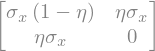

In [22]:
sigma_ij = sp.Matrix([[(1 - eta) * sigma_x, eta * sigma_x],
                    [ eta * sigma_x, 0]])
sigma_ij

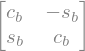

In [23]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

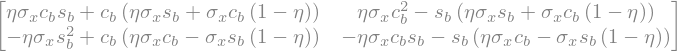

In [24]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

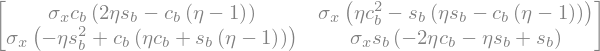

In [25]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [26]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

In [27]:
#a = sp.simplify(SIF_field)
#l = (Rot.T).inv() * a * Rot.inv()
#l

In [28]:
#sp.simplify(l)

In [29]:
#params1 = {beta:45*np.pi/180}

In [30]:
#K_I_ = K_I#.subs(params)
#K_II_ = K_II#.subs(params)
#K_I_, K_II_

In [31]:
## Representation of sin and cos components as s_t and c_t for simplicity.
s_t, c_t = sp.symbols('s_t,c_t')
#T_t = sp.Matrix([[c_t, -s_t],[s_t, c_t]])
#T_t

In [32]:
cs_theta = sp.Matrix([c_t, s_t])
cs_theta

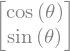

In [33]:
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])
cs_theta_

## Stress at Crack tip
Thus, the local stress state ahead of the crack tip aligned with the prexisting crack direction 
can be expressed as a function of $r$ representing the distance from the crack tip
\begin{align}
\tilde{\sigma}^\beta_{11}(r) &= \frac{1}{\sqrt{2 \pi r}} K_I \\
\tilde{\sigma}^\beta_{12}(r) &= \frac{1}{\sqrt{2 \pi r}} K_{II}.
\end{align}
The stress component parallel to crack is assumed uniform so that
\begin{align}
\tilde{\sigma}^\beta_{22}(r) &= \bar{\sigma}^\beta_{22}.
\end{align}
The tensor $\tilde{\sigma}^\beta_{ij}$ is aligned with the existing crack.
To identify the direction of the crack growth we first need to introduce 
the rotation angle $\theta$ relative to the existing crack $\beta$.
Then, a rotation operator can be introduced as a matrix
\begin{gather}
R^{\theta}_{kl} = 
\left[
\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta &  \cos \theta
\end{array} \right]
\label{eq:Tmat}
\end{gather}
so that the local stress state around the crack tip can be defined 
in polar coordinates as
\begin{align}
\tilde{\sigma}^{\theta}_{ij}(\theta, r) = R^\theta_{ki} \tilde{\sigma}^\beta_{ij} R^\theta_{jl}.
\end{align}
A solution for the stress field around the crack tip shown in figure was conceptualized by Westergaard which was further simplified by Irwin using the Airy Stress Functions based on the assumption that the material is isotropic. The solution of stress field in an infinite plate containing a crack found by Westergaard is given in complex numbers. Furthermore, this equation of complex numbers was taken to obtain stress field around the rupture which can generally be represented as:
\begin{align}
\bar{\sigma}^{\beta}_{ij}(\rho) = \frac{\left[ K_I S_{ij}^I(\theta) + K_{II} S_{ij}^{II}(\theta) \right]}{\sqrt{2\pi \rho}}
\label{eq:dominantstresses}
\end{align}
Hence, with respect to equation the local stress state in the vicinity of the crack tip can be described 
using the stress intensity factors $K_I$ and $K_{II}$ in combination with 
angular functions for mode I and mode II. The angular functions were obtained during Irwin formulation and are reported here directly as:
\rch{specify a reference to where is it derived.}
\rch{This was denoted as $\sigma^{\mathrm{tip}}$ before. But this is simply rotating the 
}
\rch{Don't use mathrm for mathematical symbols!}
\rch{
by saying "obtained from" you indicate that you want to explain 
what is the procedure to derive these angular functions -- but you just
write down the formulas. How are they derived?}
\begin{gather}
S_{ij}^{I}(\theta) = 
\left[
\begin{array}{cc}
S^{I}_{11} & S^{I}_{12} \\
S^{I}_{12} &  S^{I}_{22}
\end{array}
\right] =
\\\left[
\begin{array}{cc}
2 \cos\frac{\theta}{2} -\cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] & \cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} \\
\cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} &  \cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right]
\end{array}
\right] 
\label{eq:SI}
\end{gather}
\begin{gather}
S_{ij}^{II}(\theta) = 
\left[
\begin{array}{cc}
S^{II}_{11} & S^{II}_{12} \\
S^{II}_{12} &  S^{II}_{22}
\end{array}
\right] =
\\\left[
\begin{array}{cc}
-2 \sin\frac{\theta}{2} - \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2} & \cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] \\
\cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] &  \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2}
\end{array}
\right] 
\label{eq:SII}
\end{gather}
where, $\rho$ shows radial distance for the crack to propagate and $\theta$ constitutes the angle of propagation whose direction depends on the loading direction of the far field stresses. 

<img src="Transformationfigure.png" width="500"/>

## Angular Function

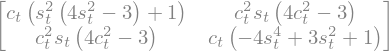

In [34]:
s_3t = 3 * s_t - 4 * s_t**3
c_3t = 4 * c_t**3 - 3 * c_t
S_I_11 = 2 * c_t - c_t * (1 + s_t * s_3t) 
S_I_22 = c_t * (1 + s_t * s_3t)
S_I_12 = c_t * s_t * c_3t
S_I = sp.Matrix([[S_I_11, S_I_12],[S_I_12, S_I_22]])
S_I_ = sp.simplify(S_I)
S_I_

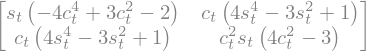

In [35]:
S_II_11 = - 2 * s_t - s_t * c_t * c_3t  
S_II_22 = s_t * c_t * c_3t
S_II_12 = c_t * (1 - s_t * s_3t)
S_II = sp.Matrix([[S_II_11, S_II_12],[S_II_12, S_II_22]])
S_II_ = sp.simplify(S_II)
S_II_

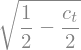

In [36]:
c_t_h = sp.sqrt((1 + c_t)/2)
s_t_h = sp.sqrt((1 - c_t)/2)
s_t_h

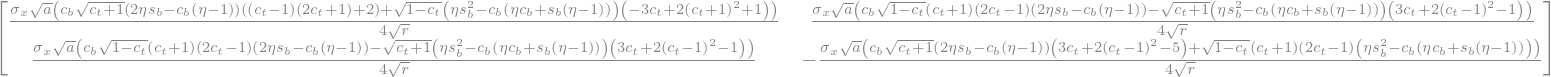

In [37]:
sigma_tip_ij = sp.Matrix([[K_I * S_I_[0,0] + K_II * S_II_[0,0], K_I * S_I_[0,1] + K_II * S_II_[0,1]],
                   [K_I * S_I_[0,1] + K_II * S_II_[0,1], K_I * S_I_[1,1] + K_II * S_II_[1,1]]])
sigma_tip_ij_ = sp.simplify(sigma_tip_ij.subs(c_t, c_t_h).subs(s_t, s_t_h)) / sp.sqrt(2 * sp.pi * r)
sigma_tip_ij_

## Tip Stress Transformation
Here again, transformation is required to represent the stress profile with respect to the polar coordinates for exact representation of the stresses on the propagating crack. Hence,
\begin{gather}
\tilde{\sigma}^{\theta}_{ij}(\theta, r) = R^\theta_{ki} \tilde{\sigma}^\beta_{ij} R^\theta_{jl}
\label{eq:sigmatt}
\end{gather}
where,
\begin{gather}
R^{\theta}_{kl} = 
\left[
\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta &  \cos \theta
\end{array} \right]
\end{gather}
For better understanding of the concept the complete transformation from the far field stresses to the stress profile on the propagating crack is shown in figure. 

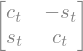

In [38]:
R_theta = sp.Matrix([[cs_theta[0], -cs_theta[1]],[cs_theta[1], cs_theta[0]]])
R_theta

In [39]:
sig_tip_theta_ij = R_theta.T * sigma_tip_ij_ * R_theta
sig_tip_theta_ij_ = sp.simplify(sig_tip_theta_ij)
sig_tip_theta_ij_;

Replacing sine component with cosine for transforming the equation into a single trignometric ratio for simpicity.

In [40]:
s_t_ = sp.sqrt(1 - c_t**2)
sig_tip_theta_ij_sub = sig_tip_theta_ij_.subs(s_t, s_t_)
sig_tip_theta_ij_sub;

In [41]:
sig_tip_theta_ij_sim = sp.simplify(sig_tip_theta_ij_sub)
sig_tip_theta_ij_sim;

However, the direction angle of the propagating crack can be obtained by using the main condition of Maximum Principal Stress Theory (MPS), which states that the stresses are principal i.e. $\tilde{\sigma}^{\theta}_{11}$ and $\tilde{\sigma}^{\theta}_{22}$ are maximum, therefore:
\begin{align}
\tilde{\sigma}^{\theta}_{12} = 0
\label{eq:condition}
\end{align}

In [42]:
#sig_tip_theta_sim[1,0].subs(params)

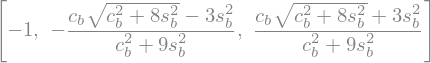

In [43]:
params = {eta : 0}
cos_theta_sigma_tension = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params), c_t)
cos_theta_sigma_tension

In [44]:
theta_pure_tension = cos_theta_sigma_tension[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_pt = sp.acos(theta_pure_tension)
get_theta_sig_pt = sp.lambdify((beta), theta_pt, 'numpy')
get_theta_sig_pt

<function _lambdifygenerated(Dummy_172)>

In [45]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta_0_ts = np.linspace(0 * np.pi/180, 31.70 * np.pi/180, 20)
beta_1_ts = np.linspace(31.70 * np.pi/180, 90 * np.pi/180, 80)
beta_ts = np.concatenate((beta_0_ts, beta_1_ts  ))
theta_sig_pt = -get_theta_sig_pt(beta_ts)
ax1.plot(beta_ts * 180/np.pi, theta_sig_pt * 180/ np.pi, color='orange', lw=2, label = r'$Uniaxial\,Tension$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("crackpropagationagainstinclination.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

In [46]:
a_ = 1
H_ = 60
H_crack = 20
V_crack = 0
i = 0
beta_ = 1.57
coordinates_pt = np.zeros((1,2))
coordinates_pt = coordinates_pt[np.newaxis,:,:]
for i in range(500):
    new_coord = np.array([H_crack,V_crack]).reshape(1,2)
    new_coord = new_coord[np.newaxis,:,:]
    coordinates_pt = np.concatenate((coordinates_pt,new_coord))
    V_crack += (a_ * np.cos(beta_))
    H_crack += (a_ * np.sin(beta_))
    if beta_ < 0:
        #beta_ += get_theta_sig_xy02(beta_)
        beta_ += get_theta_sig_pt(beta_)
    #beta_ = abs(beta_)
    elif beta_ > 0:
        beta_ += -get_theta_sig_pt(beta_)
    
    
        
    print(beta_* 180/np.pi)
    #print(V_crack)
    #print(H_crack)
    #print("**********************")
    i += 1
    #print(i)
    
    if abs(V_crack) > H_ or H_crack > 60: #or V_crack < 0:# or i>15:
        break
#print(coordinates)

19.440802480720052
-13.172151972499847
10.85811486990897
-9.489565849018117
8.549301038675637
-7.849172684697226
7.3005130469031
-6.854965170592816
6.48349654162015
-6.167436680432997
5.894139735172319
-5.6546851045956394
5.4425703333784465
-5.25292573440192
5.08202068578131
-4.926941390284498
4.785373749507285
-4.655453016046467
4.535657189842618
-4.424729844972387
4.321623226627958
-4.225455602280946
4.135478824137657
-4.0510533295466065
3.9716286413920523
-3.8967279914016455
3.825936072849187
-3.758889195826132
3.6952673065347335
-3.6347874668536404
3.57719848818661
-3.5222764853502433
3.469821169500478
-3.419652739016944
3.3716092574826857
-3.3255444309736486
3.2813257146568664
-3.2388326924883573
3.197955684606122
-3.15859454550643
3.1206576228396576
-3.0840608520330077
3.0487269662678917
-3.014584804819989
2.9815687055972293
-2.9496179700146863
2.9186763902333257
-2.8886918303450355
2.859615854371879
-2.831403395012511
2.8040124579607286
-2.777403857365855
2.7515409786260383
-2.7

In [47]:
L_, H_, B_ = 60, 60, 20
x_aC = np.array([[0, L_, L_, 0, 0], 
                 [0, 0, H_, H_, 0]], dtype=np.float_)
x_Ca = x_aC.T
x_Ca

array([[ 0.,  0.],
       [60.,  0.],
       [60., 60.],
       [ 0., 60.],
       [ 0.,  0.]])

In [48]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='blue', lw=2, label = r'$beam$')
ax1.plot(coordinates_pt[:,:,0], coordinates_pt[:,:,1], color='red', lw=2, label = r'$crack$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
_.savefig("crackplotnew1.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

# R-curve concept for calculating crack length

In [49]:
f_1 = sp.Symbol('f_1', nonnegative = True)
f_2 = sp.Symbol('f_2', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
alpha = sp.Symbol('alpha', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
a_c = sp.Symbol('a_c', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
P = sp.Symbol('P', nonnegative = True)
S = sp.Symbol('S', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
COD = sp.Symbol('COD', nonnegative = True)
K_Ic = sp.Symbol('K_{Ic}', nonnegative = True)

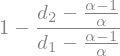

In [50]:
d_1 = sp.Symbol('d_1')
d_2 = sp.Symbol('d_2')
psi = 1 - ((d_2 - (alpha - 1)/alpha)/(d_1 - (alpha - 1)/alpha)) * \
        ((alpha * a_0 - a_0)/(alpha * a_0 - a_0))**(d_2 - d_1)
psi

In [51]:
params = {f_2 : 1.42, 
          E: 20000, #N/mm2
          P_max : 10, #N 
          D : 19, #mm
          H_0 : 3, #mm
          B : 76.2, #mm
          S : 304.8, #mm
          P : 120, #N
          pi : 3.14, 
          #a_0: 10, #mm
          f_1: 1.123,
          #COD : 0.0094, ##mm
          K_Ic : 31.4 #N/mm2
         }

In [52]:
sigma_x = (P * S) / B**2
sigma_x_ = sigma_x.subs(params)
sigma_x_

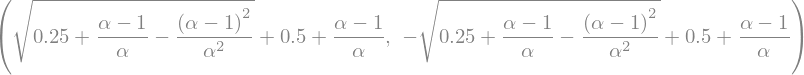

In [53]:
alpha_ = sp.Symbol(r'\alpha')
d_1 = (1/2) + ((alpha_ - 1) / alpha_) + sp.sqrt(1/4 + (alpha_ - 1) / alpha_\
                                                            - ((alpha_ - 1) / alpha_)**2)
d_2 = (1/2) + ((alpha_ - 1) / alpha_) - sp.sqrt(1/4 + (alpha_ - 1) / alpha_ \
                                                            - ((alpha_ - 1) / alpha_)**2)
d_1, d_2

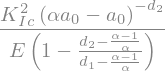

In [54]:
K_Ic = sp.Symbol('K_Ic')
alpha_ = sp.Symbol(r'\alpha')
a_0_ = sp.Symbol(r'a_0')
d_2 = sp.Symbol(r'd_2')
E = sp.Symbol(r'E')
d_1 = sp.Symbol(r'd_1')
beta_2 = (K_Ic**2 * (alpha_ * a_0_ - a_0_)**(-d_2)) / (E * (1 - (d_2 - ((alpha_-1)/alpha_))\
                                                            /(d_1 - ((alpha_-1)/alpha_))))
beta_2

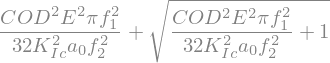

In [55]:
f_1 = sp.Symbol('f_1', nonnegative = True)
f_2 = sp.Symbol('f_2', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
COD_ = sp.Symbol('COD', nonnegative = True)
K_Ic = sp.Symbol('K_{Ic}', nonnegative = True)
alpha_ = (pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_

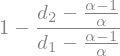

In [56]:
a_0_ = sp.Symbol(r'a_0')
d_2 = sp.Symbol(r'd_2')
E = sp.Symbol(r'E')
d_1 = sp.Symbol(r'd_1')
alpha_ = sp.Symbol(r'\alpha')
psi = 1 - ((d_2 - (alpha_ - 1)/alpha_)/(d_1 - (alpha_ - 1)/alpha_)\
              ) * ((alpha_ * a_0_ - a_0_)/(alpha_ * a_0_ - a_0_))**(d_2 - d_1) 
psi

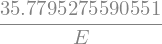

In [57]:
CMOD = (4 * sigma_x.subs(params) * f_2.subs(params)) / E.subs(params)
CMOD

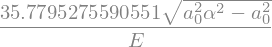

In [58]:
COD = CMOD * sp.sqrt((alpha * a_0)**2 - a_0**2)
COD_ = COD.subs(params)
COD_

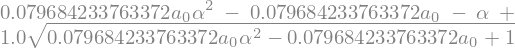

In [59]:
alpha_ = (pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_sim = sp.simplify(alpha_.subs(params))
alpha_val = alpha_sim - alpha
alpha_diff = alpha_val.diff(alpha)
#alpha_val
alpha_val

In [60]:
alpha_0 = 1
a_0_ = 1
alpha_val = alpha_sim - alpha
alpha_val.subs(a_0, a_0_)
get_alpha_val = sp.lambdify((alpha), alpha_val.subs(a_0, a_0_), 'numpy')
get_alpha_val

<function _lambdifygenerated(alpha)>

In [61]:
import scipy.optimize as sc
a_0_ = 1
H_ = 600
V_ = 200
H_crack = 20
V_crack = 0
beta_ = 0.78
alpha_0 = 1.00
E_ = 20000 #N/mm2
K_Ic_ = 31.4 #N/mm2
i = 0
#alpha_ans = []
coordinates_pt = np.zeros((1,2))
coordinates_pt = coordinates_pt[np.newaxis,:,:]
for i in range(20):
    new_coord = np.array([H_crack,V_crack]).reshape(1,2)
    new_coord = new_coord[np.newaxis,:,:]
    coordinates_pt = np.concatenate((coordinates_pt,new_coord))
    V_crack += (a_0_ * np.cos(beta_))
    H_crack += (a_0_ * np.sin(beta_))
    alpha_val = alpha_sim - alpha
    alpha_diff = alpha_val.diff(alpha)
    alpha_n = alpha_0 - (alpha_val/alpha_diff)
    alpha_val = sp.solve(alpha_n.subs(a_0, a_0_))
    if alpha_val[0] > 1:
        alpha_ans = alpha_val[0]
    elif alpha_val[0] < 1:
        alpha_ans = alpha_val[1]
    #print('alpha =',alpha_ans)
    print('beta = ', beta_* 180/np.pi)
    if beta_ < 0:
            #beta_ += get_theta_sig_xy02(beta_)
            beta_ += get_theta_sig_pt(beta_)
            #beta_ = abs(beta_)
    elif beta_ > 0:
            beta_ += -get_theta_sig_pt(beta_)
    
    COD_val = COD_.subs(alpha, alpha_ans).subs(a_0, a_0_).subs(E, E_)
    d_1 = (1/2) + (( alpha_ans - 1) /  alpha_ans) + sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans\
                                         - (( alpha_ans - 1) /  alpha_ans)**2)
    d_2 = (1/2) + (( alpha_ans - 1) /  alpha_ans) - sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans \
                                         - (( alpha_ans - 1) /  alpha_ans)**2)
    beta_2 = (K_Ic_**2 * ( alpha_ans * a_0_ - a_0_)**(-d_2)) / (E_ * (1 - (d_2 - (( alpha_ans-1)/ alpha_ans))\
                                 /(d_1 - (( alpha_ans-1)/ alpha_ans))))
    #beta_2_ = beta_2.subs(E, E_).subs(K_Ic, K_Ic_)
    psi = 1 - ((d_2 - ( alpha_ans - 1) /  alpha_ans)/(d_1  - ( alpha_ans - 1) /  alpha_ans)) * \
            ((alpha_ * a_0_ - a_0_)/(alpha_ * a_0_ - a_0_))**(d_2 - d_1)#- (alpha_ - 1)/alpha_)
                
    #R_ = R.subs(E, E_).subs(K_Ic, K_Ic_)
    #R =  beta_2_ * psi * ((alpha_ans * a_0_) - a_0_)**d_2
    R = beta_2 * (( alpha_ans * a_0_) - a_0_)**d_2
    a_0_ =  alpha_ans * a_0_
    #alpha_0 = alpha_ans
    print('a_0=', a_0_)
    print('COD_val=', COD_val)
    print('V_crack=', V_crack)
    print('H_crack=', H_crack)
    print('beta_2 =', beta_2)
    print('d_1 =',d_1)
    print('d_2 =',d_2)
    print('psi =',psi)
    print('R =',R)
    print('alpha =',alpha_ans)
    print('alpha_root =',alpha_val)
    print('*******************')
    i  += 1
    if abs(V_crack) > V_ or H_crack > H_: #or V_crack < 0:# or i>15:
        break

beta =  44.69070802020421
a_0= 1.85700740442849
COD_val= 0.00279932018773977
V_crack= 0.7109135380122773
H_crack= 20.70327941920041
beta_2 = 0.0437971316354245
d_1 = 1.66755703520943
d_2 = 0.255441335593770
psi = 1.17085237647652
R = 0.0421043685698054
alpha = 1.85700740442849
alpha_root = [1.85700740442849, 9.98684049139402]
*******************
beta =  -8.27382187639407
a_0= 3.11600577660692
COD_val= 0.00447638050356496
V_crack= 2.54859254332369
H_crack= 20.4360484824811
beta_2 = 0.0403072896391578
d_1 = 1.60460795581349
d_2 = 0.203476792700280
psi = 1.16705924660655
R = 0.0422412145256064
alpha = 1.67797164899614
alpha_root = [1.67797164899614, 5.25425413083317]
*******************
beta =  7.636012335150972
a_0= 4.09470035418244
COD_val= 0.00475244495499099
V_crack= 5.63696625641158
H_crack= 20.8501013875010
beta_2 = 0.0434791447693005
d_1 = 1.39619589420911
d_2 = 0.0818339946328641
psi = 1.13583091721040
R = 0.0434025868225843
alpha = 1.31408625263886
alpha_root = [1.31408625263886,

In [62]:
L_, H_, B_ = 100, 200, 20
x_aC = np.array([[0, L_, L_, 0, 0], 
                 [0, 0, H_, H_, 0]], dtype=np.float_)
x_Ca = x_aC.T
x_Ca

array([[  0.,   0.],
       [100.,   0.],
       [100., 200.],
       [  0., 200.],
       [  0.,   0.]])

In [63]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='blue', lw=2, label = r'$beam$')
ax1.plot(coordinates_pt[:,:,0], coordinates_pt[:,:,1], color='red', lw=2, label = r'$crack$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
_.savefig("crackplotnew1.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

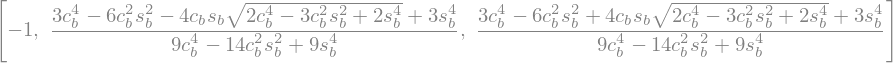

In [64]:
params_ = {eta : 1} 
cos_theta_sigma_pure_shear = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_), c_t)
cos_theta_sigma_pure_shear

In [65]:
theta_pure_shear = cos_theta_sigma_pure_shear[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_ps = sp.acos(theta_pure_shear)
get_theta_sig_ps = sp.lambdify((beta), theta_sig_ps, 'numpy')
get_theta_sig_ps

<function _lambdifygenerated(Dummy_281)>

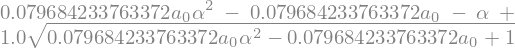

In [66]:
alpha = sp.Symbol('alpha', nonnegative = True)
alpha_ = (pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_sim = sp.simplify(alpha_.subs(params))
alpha_val = alpha_sim - alpha
alpha_diff = alpha_val.diff(alpha)
#alpha_val
alpha_val

In [67]:
import scipy.optimize as sc
a_0_ = 1
H_ = 600
V_ = 200
H_crack = 20
V_crack = 0
beta_ = 0
alpha_0 = 1.00
E_ = 20000 #N/mm2
K_Ic_ = 31.4 #N/mm2
i = 0
coordinates_ps = np.zeros((1,2))
coordinates_ps = coordinates_ps[np.newaxis,:,:]
for i in range(10):
    new_coord = np.array([H_crack,V_crack]).reshape(1,2)
    new_coord = new_coord[np.newaxis,:,:]
    coordinates_ps = np.concatenate((coordinates_ps,new_coord))
    V_crack += (a_0_ * np.cos(beta_))
    H_crack += (a_0_ * np.sin(beta_))
    alpha_val = alpha_sim - alpha
    alpha_diff = alpha_val.diff(alpha)
    alpha_n = alpha_0 - (alpha_val/alpha_diff)
    alpha_val = sp.solve(alpha_n.subs(a_0, a_0_))
    if alpha_val[0] > 1:
        alpha_ans = alpha_val[0]
    elif alpha_val[0] < 1:
        alpha_ans = alpha_val[1]
    #print('alpha =',alpha_ans)
    print('beta = ', beta_* 180/np.pi)
    if beta_ < 0.78:
        #beta_ += get_theta_sig_xy02(beta_)
        beta_ += +get_theta_sig_ps(beta_)
    elif beta_ > 0.78:
        beta_ += -get_theta_sig_ps(beta_)
    COD_val = COD_.subs(alpha, alpha_ans).subs(a_0, a_0_).subs(E, E_)
    d_1 = (1/2) + (( alpha_ans - 1) /  alpha_ans) + sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans\
                                         - (( alpha_ans - 1) /  alpha_ans)**2)
    d_2 = (1/2) + (( alpha_ans - 1) /  alpha_ans) - sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans \
                                         - (( alpha_ans - 1) /  alpha_ans)**2)
    beta_2 = (K_Ic_**2 * ( alpha_ans * a_0_ - a_0_)**(-d_2)) / (E_ * (1 - (d_2 - (( alpha_ans-1)/ alpha_ans))\
                                 /(d_1 - (( alpha_ans-1)/ alpha_ans))))
    #beta_2_ = beta_2.subs(E, E_).subs(K_Ic, K_Ic_)
    psi = 1 - ((d_2 - ( alpha_ans - 1) /  alpha_ans)/(d_1  - ( alpha_ans - 1) /  alpha_ans)) * \
            ((alpha_ * a_0_ - a_0_)/(alpha_ * a_0_ - a_0_))**(d_2 - d_1)#- (alpha_ - 1)/alpha_)
                
    #R_ = R.subs(E, E_).subs(K_Ic, K_Ic_)
    #R =  beta_2_ * psi * ((alpha_ans * a_0_) - a_0_)**d_2
    R = beta_2 * (( alpha_ans * a_0_) - a_0_)**d_2
    a_0_ =  alpha_ans * a_0_
    #alpha_0 = alpha_ans
    print('a_0=', a_0_)
    print('COD_val=', COD_val)
    print('V_crack=', V_crack)
    print('H_crack=', H_crack)
    print('beta_2 =', beta_2)
    print('d_1 =',d_1)
    print('d_2 =',d_2)
    print('psi =',psi)
    print('R =',R)
    print('alpha =',alpha_ans)
    print('alpha_root =',alpha_val)
    print('*******************')
    i  += 1
    if abs(V_crack) > V_ or H_crack > H_: #or V_crack < 0:# or i>15:
        break

beta =  0.0
a_0= 1.85700740442849
COD_val= 0.00279932018773977
V_crack= 1.0
H_crack= 20.0
beta_2 = 0.0437971316354245
d_1 = 1.66755703520943
d_2 = 0.255441335593770
psi = 1.17085237647652
R = 0.0421043685698054
alpha = 1.85700740442849
alpha_root = [1.85700740442849, 9.98684049139402]
*******************
beta =  70.52877936550931
a_0= 3.11600577660692
COD_val= 0.00447638050356496
V_crack= 1.61900246814283
H_crack= 21.7508033711800
beta_2 = 0.0403072896391578
d_1 = 1.60460795581349
d_2 = 0.203476792700280
psi = 1.16705924660655
R = 0.0422412145256064
alpha = 1.67797164899614
alpha_root = [1.67797164899614, 5.25425413083317]
*******************
beta =  14.380387665048646
a_0= 4.09470035418244
COD_val= 0.00475244495499099
V_crack= 4.63737827120005
H_crack= 22.5246893520366
beta_2 = 0.0434791447693005
d_1 = 1.39619589420911
d_2 = 0.0818339946328641
psi = 1.13583091721040
R = 0.0434025868225843
alpha = 1.31408625263886
alpha_root = [1.31408625263886, 3.41117106634820]
*******************
be

In [68]:
L_, H_, B_ = 600, 200, 20
x_aC = np.array([[0, L_, L_, 0, 0], 
                 [0, 0, H_, H_, 0]], dtype=np.float_)
x_Ca = x_aC.T
x_Ca

array([[  0.,   0.],
       [600.,   0.],
       [600., 200.],
       [  0., 200.],
       [  0.,   0.]])

In [69]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='blue', lw=2, label = r'$beam$')
ax1.plot(coordinates_ps[:,:,0], coordinates_ps[:,:,1], color='red', lw=2, label = r'$crack$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
_.savefig("crackplotnew1.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

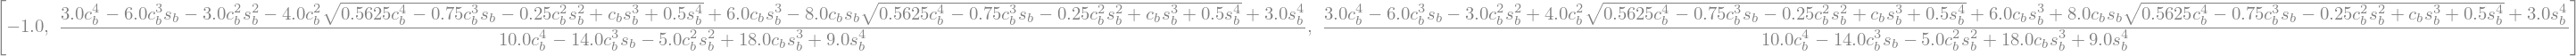

In [70]:
params_ = {eta : 0.5} 
cos_theta_sigma_tension_shear = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_), c_t)
cos_theta_sigma_tension_shear

In [71]:
theta_sig_tension_shear = cos_theta_sigma_tension_shear[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_ts = sp.acos(theta_sig_tension_shear)
get_theta_sig_ts = sp.lambdify((beta), theta_sig_ts, 'numpy')
get_theta_sig_ts

<function _lambdifygenerated(Dummy_404)>

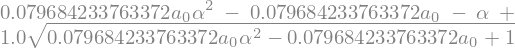

In [72]:
alpha = sp.Symbol('alpha', nonnegative = True)
alpha_ = (pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_sim = sp.simplify(alpha_.subs(params))
alpha_val = alpha_sim - alpha
alpha_diff = alpha_val.diff(alpha)
#alpha_val
alpha_val

In [73]:
import scipy.optimize as sc
a_0_ = 1
H_ = 100
V_ = 100
H_crack = 20
V_crack = 0
beta_ = 0
alpha_0 = 1.00
E_ = 20000 #N/mm2
K_Ic_ = 31.4 #N/mm2
i = 0
coordinates_ts = np.zeros((1,2))
coordinates_ts = coordinates_ts[np.newaxis,:,:]
for i in range(10):
    new_coord = np.array([H_crack,V_crack]).reshape(1,2)
    new_coord = new_coord[np.newaxis,:,:]
    coordinates_ts = np.concatenate((coordinates_ts,new_coord))
    V_crack += (a_0_ * np.cos(beta_))
    H_crack += (a_0_ * np.sin(beta_))
    alpha_val = alpha_sim - alpha
    alpha_diff = alpha_val.diff(alpha)
    alpha_n = alpha_0 - (alpha_val/alpha_diff)
    alpha_val = sp.solve(alpha_n.subs(a_0, a_0_))
    if alpha_val[0] > 1:
        alpha_ans = alpha_val[0]
    elif alpha_val[0] < 1:
        alpha_ans = alpha_val[1]
    #print('alpha =',alpha_ans)
    print('beta = ', beta_* 180/np.pi)
    if beta_ < 0.39:
        #beta_ += get_theta_sig_xy02(beta_)
        beta_ += +get_theta_sig_ts(beta_)
    elif beta_ > 0.39:
        beta_ += -get_theta_sig_ts(beta_)
    COD_val = COD_.subs(alpha, alpha_ans).subs(a_0, a_0_).subs(E, E_)
    d_1 = (1/2) + (( alpha_ans - 1) /  alpha_ans) + sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans\
                                         - (( alpha_ans - 1) /  alpha_ans)**2)
    d_2 = (1/2) + (( alpha_ans - 1) /  alpha_ans) - sp.sqrt(1/4 + ( alpha_ans - 1) /  alpha_ans \
                                         - (( alpha_ans - 1) /  alpha_ans)**2)
    beta_2 = (K_Ic_**2 * ( alpha_ans * a_0_ - a_0_)**(-d_2)) / (E_ * (1 - (d_2 - (( alpha_ans-1)/ alpha_ans))\
                                 /(d_1 - (( alpha_ans-1)/ alpha_ans))))
    #beta_2_ = beta_2.subs(E, E_).subs(K_Ic, K_Ic_)
    psi = 1 - ((d_2 - ( alpha_ans - 1) /  alpha_ans)/(d_1  - ( alpha_ans - 1) /  alpha_ans)) * \
            ((alpha_ * a_0_ - a_0_)/(alpha_ * a_0_ - a_0_))**(d_2 - d_1)#- (alpha_ - 1)/alpha_)
                
    #R_ = R.subs(E, E_).subs(K_Ic, K_Ic_)
    #R =  beta_2_ * psi * ((alpha_ans * a_0_) - a_0_)**d_2
    R = beta_2 * (( alpha_ans * a_0_) - a_0_)**d_2
    a_0_ =  alpha_ans * a_0_
    #alpha_0 = alpha_ans
    print('a_0=', a_0_)
    print('COD_val=', COD_val)
    print('V_crack=', V_crack)
    print('H_crack=', H_crack)
    print('beta_2 =', beta_2)
    print('d_1 =',d_1)
    print('d_2 =',d_2)
    print('psi =',psi)
    print('R =',R)
    print('alpha =',alpha_ans)
    print('alpha_root =',alpha_val)
    print('*******************')
    i  += 1
    if abs(V_crack) > V_ or H_crack > H_: #or V_crack < 0:# or i>15:
        break

beta =  0.0
a_0= 1.85700740442849
COD_val= 0.00279932018773977
V_crack= 1.0
H_crack= 20.0
beta_2 = 0.0437971316354245
d_1 = 1.66755703520943
d_2 = 0.255441335593770
psi = 1.17085237647652
R = 0.0421043685698054
alpha = 1.85700740442849
alpha_root = [1.85700740442849, 9.98684049139402]
*******************
beta =  53.13010235415598
a_0= 3.11600577660692
COD_val= 0.00447638050356496
V_crack= 2.11420444265710
H_crack= 21.4856059235428
beta_2 = 0.0403072896391578
d_1 = 1.60460795581349
d_2 = 0.203476792700280
psi = 1.16705924660655
R = 0.0422412145256064
alpha = 1.67797164899614
alpha_root = [1.67797164899614, 5.25425413083317]
*******************
beta =  9.96538932262089
a_0= 4.09470035418244
COD_val= 0.00475244495499099
V_crack= 5.18319738560656
H_crack= 22.0248408593307
beta_2 = 0.0434791447693005
d_1 = 1.39619589420911
d_2 = 0.0818339946328641
psi = 1.13583091721040
R = 0.0434025868225843
alpha = 1.31408625263886
alpha_root = [1.31408625263886, 3.41117106634820]
*******************
beta

In [74]:
L_, H_, B_ = 100, 100, 20
x_aC = np.array([[0, L_, L_, 0, 0], 
                 [0, 0, H_, H_, 0]], dtype=np.float_)
x_Ca = x_aC.T
x_Ca

array([[  0.,   0.],
       [100.,   0.],
       [100., 100.],
       [  0., 100.],
       [  0.,   0.]])

In [75]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='blue', lw=2, label = r'$beam$')
ax1.plot(coordinates_ts[:,:,0], coordinates_ts[:,:,1], color='red', lw=2, label = r'$crack$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
_.savefig("crackplotnew1.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

In [76]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='blue', lw=2, label = r'$beam$')
ax1.plot(coordinates_pt[:,:,0], coordinates_pt[:,:,1], color='green', lw=2, label = r'$pure\, tension$')
ax1.plot(coordinates_ts[:,:,0], coordinates_ts[:,:,1], color='orange', lw=2, label = r'$tension\,shear$')
ax1.plot(coordinates_ps[:,:,0], coordinates_ps[:,:,1], color='red', lw=2, label = r'$pure\,shear$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
_.savefig("crackplotnew1.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

In [77]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta_pt_0 = np.linspace(-90 * np.pi/180, 0 * np.pi/180, 50)
beta_pt_1 = np.linspace(0 * np.pi/180, 90 * np.pi/180, 50)
beta_pt = np.concatenate((beta_pt_0, beta_pt_1  ))
beta_0_ts = np.linspace(0 * np.pi/180, 31.70 * np.pi/180, 20)
beta_1_ts = np.linspace(31.70 * np.pi/180, 90 * np.pi/180, 80)
beta_ts = np.concatenate((beta_0_ts, beta_1_ts  ))
theta_sig_pt_0 = get_theta_sig_pt(beta_pt_0)
theta_sig_pt_1 = -get_theta_sig_pt(beta_pt_1)
theta_sig_pt = np.concatenate((theta_sig_pt_0, theta_sig_pt_1  ))
theta_sig_pt = -get_theta_sig_pt(beta_ts)
beta_0_ps = np.linspace(0 * np.pi/180, 45 * np.pi/180, 50)
beta_1_ps = np.linspace(45 * np.pi/180, 90 * np.pi/180, 50)
beta_ps = np.concatenate((beta_0_ps, beta_1_ps))
theta_sig_ps_1 = get_theta_sig_ps(beta_0_ps)
theta_sig_ps_2 = -get_theta_sig_ps(beta_1_ps)
#if beta_ps.any() == 45 * np.pi/180:
#theta_ps_0 = 0
theta_sig_ps_fin = np.concatenate((theta_sig_ps_1, theta_sig_ps_2)) #, theta_ps_0
theta_ts_1 = get_theta_sig_ts(beta_0_ts)
theta_ts_2 = -get_theta_sig_ts(beta_1_ts)
theta_sig_ts_fin = np.concatenate((theta_ts_1, theta_ts_2))
ax1.plot(beta_ts * 180/np.pi, theta_sig_ts_fin * 180/ np.pi, color='blue', lw=2, label = r'$Tension\,Shear$')
ax1.plot(beta_ps * 180/np.pi, theta_sig_ps_fin * 180/ np.pi, color='red', lw=2, label = r'$Pure\,Shear$')
ax1.plot(beta_ts * 180/np.pi, theta_sig_pt * 180/ np.pi, color='orange', lw=2, label = r'$Uniaxial\,Tension$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("crackpropagationagainstinclination.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

<string>:2: RuntimeWarning: invalid value encountered in arccos


In [78]:
theta_sig_pt * 180/ np.pi

array([ -0.        ,  -3.33120232,  -6.62901732,  -9.86223431,
       -13.00364728, -16.03128635, -18.9289621 , -21.68618266,
       -24.29760309, -26.76219942, -29.08234186, -31.26289542,
       -33.31042545, -35.23254262, -37.03739211, -38.73327434,
       -40.32837661, -41.83059316, -43.24741283, -44.58585644,
       -44.58585644, -45.15458787, -45.70980206, -46.25201352,
       -46.78171807, -47.29939318, -47.80549842, -48.30047587,
       -48.78475066, -49.25873146, -49.72281105, -50.17736682,
       -50.6227614 , -51.05934315, -51.48744675, -51.90739373,
       -52.31949301, -52.72404143, -53.12132425, -53.51161564,
       -53.89517921, -54.2722684 , -54.64312699, -55.00798952,
       -55.3670817 , -55.72062078, -56.06881602, -56.41186898,
       -56.74997391, -57.08331807, -57.41208209, -57.73644024,
       -58.05656076, -58.37260613, -58.68473333, -58.99309414,
       -59.29783534, -59.599099  , -59.89702265, -60.19173956,
       -60.48337889, -60.77206593, -61.05792229, -61.34

In [79]:
beta_ts * 180/np.pi

array([ 0.        ,  1.66842105,  3.33684211,  5.00526316,  6.67368421,
        8.34210526, 10.01052632, 11.67894737, 13.34736842, 15.01578947,
       16.68421053, 18.35263158, 20.02105263, 21.68947368, 23.35789474,
       25.02631579, 26.69473684, 28.36315789, 30.03157895, 31.7       ,
       31.7       , 32.43797468, 33.17594937, 33.91392405, 34.65189873,
       35.38987342, 36.1278481 , 36.86582278, 37.60379747, 38.34177215,
       39.07974684, 39.81772152, 40.5556962 , 41.29367089, 42.03164557,
       42.76962025, 43.50759494, 44.24556962, 44.9835443 , 45.72151899,
       46.45949367, 47.19746835, 47.93544304, 48.67341772, 49.41139241,
       50.14936709, 50.88734177, 51.62531646, 52.36329114, 53.10126582,
       53.83924051, 54.57721519, 55.31518987, 56.05316456, 56.79113924,
       57.52911392, 58.26708861, 59.00506329, 59.74303797, 60.48101266,
       61.21898734, 61.95696203, 62.69493671, 63.43291139, 64.17088608,
       64.90886076, 65.64683544, 66.38481013, 67.12278481, 67.86

In [80]:
a_ = 5
H_ = 60
H_crack = 20
V_crack = 0
i = 0
beta_ = 1.57
coordinates_ts = np.zeros((1,2))
coordinates_ts = coordinates_ts[np.newaxis,:,:]
for i in range(300):
    new_coord = np.array([H_crack,V_crack]).reshape(1,2)
    new_coord = new_coord[np.newaxis,:,:]
    coordinates_ts = np.concatenate((coordinates_ts,new_coord))
    V_crack += (a_ * np.cos(beta_))
    H_crack += (a_ * np.sin(beta_))
    if beta_ < 0.39:
        #beta_ += get_theta_sig_xy02(beta_)
        beta_ += +get_theta_sig_ts(beta_)
    elif beta_ > 0.39:
        beta_ += -get_theta_sig_ts(beta_)
    
    
        
    #print(beta_* 180/np.pi)
    #print(V_crack)
    #print(H_crack)
    #print("**********************")
    i += 1
    #print(i)
    
    if abs(V_crack) > H_ or H_crack > 200:# or i>15:
        break
#print(coordinates)

In [81]:
L_, H_, B_ = 60, 60, 20
x_aC = np.array([[0, L_, L_, 0, 0], 
                 [0, 0, H_, H_, 0]], dtype=np.float_)
x_Ca = x_aC.T
x_Ca

array([[ 0.,  0.],
       [60.,  0.],
       [60., 60.],
       [ 0., 60.],
       [ 0.,  0.]])

In [82]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='blue', lw=2, label = r'$beam$')
ax1.plot(coordinates_ts[:,:,0], coordinates_ts[:,:,1], color='red', lw=2, label = r'$crack$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
_.savefig("crackplotnew1.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

In [83]:
a_ = 5
H_ = 60
H_crack = 20
V_crack = 0
i = 0
beta_ = 1.57
coordinates_ps = np.zeros((1,2))
coordinates_ps = coordinates_ps[np.newaxis,:,:]
for i in range(300):
    new_coord = np.array([H_crack,V_crack]).reshape(1,2)
    new_coord = new_coord[np.newaxis,:,:]
    coordinates_ps = np.concatenate((coordinates_ps,new_coord))
    V_crack += (a_ * np.cos(beta_))
    H_crack += (a_ * np.sin(beta_))
    if beta_ < 0.78:
        #beta_ += get_theta_sig_xy02(beta_)
        beta_ += +get_theta_sig_ps(beta_)
    elif beta_ > 0.78:
        beta_ += -get_theta_sig_ps(beta_)
    #elif beta_ == 0.78:
    #    beta_ = beta_
    
        
    #print(beta_* 180/np.pi)
    #print(V_crack)
    #print(H_crack)
    #print("**********************")
    i += 1
    #print(i)
    #print(get_theta_sig_ps(beta_)* 180/np.pi)
    if abs(V_crack) > H_ or H_crack > 60:# or i>15:
        break
#print(coordinates)

In [84]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='blue', lw=2, label = r'$beam$')
ax1.plot(coordinates_ps[:,:,0], coordinates_ps[:,:,1], color='red', lw=2, label = r'$crack$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
_.savefig("crackplotshear.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

In [85]:
a_ = 5
H_ = 60
H_crack = 20
V_crack = 0
i = 0
beta_ = 1.57
coordinates_pt = np.zeros((1,2))
coordinates_pt = coordinates_pt[np.newaxis,:,:]
for i in range(500):
    new_coord = np.array([H_crack,V_crack]).reshape(1,2)
    new_coord = new_coord[np.newaxis,:,:]
    coordinates_pt = np.concatenate((coordinates_pt,new_coord))
    V_crack += (a_ * np.cos(beta_))
    H_crack += (a_ * np.sin(beta_))
    if beta_ < 0:
        #beta_ += get_theta_sig_xy02(beta_)
        beta_ += get_theta_sig_pt(beta_)
    #beta_ = abs(beta_)
    elif beta_ > 0:
        beta_ += -get_theta_sig_pt(beta_)
    
    
        
    print(beta_* 180/np.pi)
    #print(V_crack)
    #print(H_crack)
    #print("**********************")
    i += 1
    #print(i)
    
    if abs(V_crack) > H_ or H_crack > 60: #or V_crack < 0:# or i>15:
        break
#print(coordinates)

19.440802480720052
-13.172151972499847
10.85811486990897
-9.489565849018117
8.549301038675637
-7.849172684697226
7.3005130469031
-6.854965170592816
6.48349654162015
-6.167436680432997
5.894139735172319
-5.6546851045956394
5.4425703333784465
-5.25292573440192


In [86]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='blue', lw=2, label = r'$beam$')
ax1.plot(coordinates_pt[:,:,0], coordinates_pt[:,:,1], color='red', lw=2, label = r'$crack$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
#_.savefig("crackplotnew1.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

In [87]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='black', lw=2, label = r'$beam$')
ax1.plot(coordinates_pt[:,:,0], coordinates_pt[:,:,1], color='red', lw=2, label = r'$pure\,tension$')
ax1.plot(coordinates_ts[:,:,0], coordinates_ts[:,:,1], color='orange', lw=2, label = r'$tension\,shear$')
ax1.plot(coordinates_ps[:,:,0], coordinates_ps[:,:,1], color='green', lw=2, label = r'$pure\,shear$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
_.savefig("crackplotangleforthreecaseswhenbeta0.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

In [88]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='black', lw=2, label = r'$beam$')
ax1.plot(coordinates_pt[:,:,0], coordinates_pt[:,:,1], color='red', lw=2, label = r'$pure\,tension$')
ax1.plot(coordinates_ts[:,:,0], coordinates_ts[:,:,1], color='orange', lw=2, label = r'$tension\,shear$')
ax1.plot(coordinates_ps[:,:,0], coordinates_ps[:,:,1], color='green', lw=2, label = r'$pure\,shear$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
#_.savefig("crackplotnew1.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

In [89]:
#sigma_rr = sigma_tip_ij_[0,0].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta)).subs(c_t, sp.cos(theta))
#sigma_rr 

In [90]:
#p = {eta:0, a:1}
#sigma_rr_p = sigma_rr.subs(p)
#sigma_rr_p

In [91]:
#get_sigma_rr = sp.lambdify((sigma_x, r, theta, beta), sigma_rr_p, 'numpy')
#get_sigma_rr

In [92]:
#_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
#beta_0 = np.linspace(0 * np.pi/180, 90 * np.pi/180, 3)
#theta_ = (0, 50.83 * np.pi/180, 70.5 * np.pi/180)
#r_ = np.linspace(0, 4, 10)
#sigma_x_ = 1
#sig_rr = get_sigma_rr(sigma_x_,r_, theta_[0], beta_0[0])
#sig_rr_1 = get_sigma_rr(sigma_x_,r_, theta_[1], beta_0[1])
#sig_rr_2 = get_sigma_rr(sigma_x_,r_, theta_[2], beta_0[2])
#ax1.plot(r_, sig_rr, color='blue', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
#ax1.plot(r_, sig_rr_1, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
#ax1.plot(r_, sig_rr_2, color='green', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
#ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\sigma_{\theta \theta}$')
#ax1.legend()

In [93]:
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#beta_0 = np.linspace(0 * np.pi/180, 90 * np.pi/180, 3)
#theta_ = get_theta_sig_xy0(beta_0[0])
#r_ = np.linspace(0, 4, 3)
#sig_rr = get_sigma_rr(sigma_x_,r_, theta_, beta_0[0])
#sig_rr_ = get_sigma_rr(sigma_x_,r_, theta_, beta_0[1])
#sig_rr_1 = get_sigma_rr(sigma_x_,r_, theta_, beta_0[2])
#ax.plot3D(r_, beta_0*180/np.pi, sig_rr)
#ax.plot3D(r_, beta_0*180/np.pi, sig_rr_)
#ax.plot3D(r_, beta_0*180/np.pi, sig_rr_1)

## Mixity Parameter

Mode mixity is given as: 
\begin{gather*}
    M_e = \left|\frac{2}{\pi} \arctan \left(\frac{K_I}{K_{II}} \right)\right|
\end{gather*}
where $M_e = 0$ depicts the pure mode II failure and $M_e = 1$ highlights a pure mode I failure.

In [94]:
beta = sp.Symbol(r'\beta', nonnegative = True)
eta = sp.Symbol(r'\eta', Znonnegative = True)

In [132]:
sigma_ij = sp.Matrix([[(1 - eta) * sigma_x, eta * sigma_x], #eta * sigma_x
                      [eta * sigma_x, 0]])
sigma_ij

NameError: name 'bar_sigma' is not defined

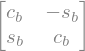

In [96]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

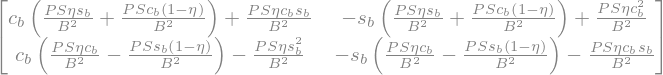

In [97]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

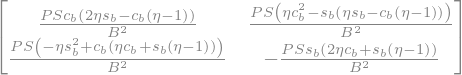

In [98]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

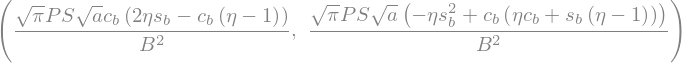

In [99]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

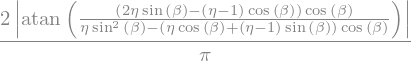

In [100]:
M_e = (2 / sp.pi) * sp.atan(K_I/K_II)
M_e_ = sp.Abs(M_e.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
M_e_

In [101]:
get_M_e = sp.lambdify((eta, beta), M_e_, 'numpy')
get_M_e

<function _lambdifygenerated(Dummy_501, Dummy_502)>

In [103]:
theta_pure_tension = cos_theta_sigma_tension[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_pt = sp.acos(theta_pure_tension)
get_theta_sig_pt = sp.lambdify((beta), theta_pt, 'numpy')
get_theta_sig_pt

<function _lambdifygenerated(Dummy_503)>

In [105]:
theta_pure_shear = cos_theta_sigma_pure_shear[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_ps = sp.acos(theta_pure_shear)
get_theta_sig_ps = sp.lambdify((beta), theta_sig_ps, 'numpy')
get_theta_sig_ps

<function _lambdifygenerated(Dummy_504)>

In [107]:
theta_sig_tension_shear = cos_theta_sigma_tension_shear[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_ts = sp.acos(theta_sig_tension_shear)
get_theta_sig_ts = sp.lambdify((beta), theta_sig_ts, 'numpy')
get_theta_sig_ts

<function _lambdifygenerated(Dummy_505)>

<IPython.core.display.Javascript object>


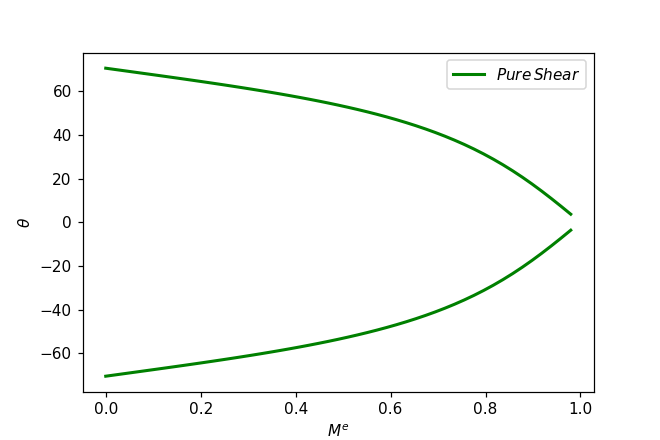

<string>:2: RuntimeWarning: invalid value encountered in arccos
<string>:2: RuntimeWarning: divide by zero encountered in true_divide


In [108]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
beta_ps1 = np.linspace(0, 45 * np.pi/180, 50)
beta_ps2 = np.linspace(45 * np.pi/180, 90 * np.pi/180, 50)
beta_ps = np.concatenate((beta_ps1, beta_ps2))
beta_ts1 = np.linspace(0, 31.70 * np.pi/180, 20)
beta_ts2 = np.linspace(31.70 * np.pi/180, 90 * np.pi/180, 80)
beta_ts = np.concatenate((beta_ts1, beta_ts2))
theta_sig_pt = get_theta_sig_pt(beta_)
theta_sig_ps1 = get_theta_sig_ps(beta_ps1)
theta_sig_ps2 = -get_theta_sig_ps(beta_ps2)
theta_sig_ps = np.concatenate((theta_sig_ps1, theta_sig_ps2))
theta_sig_ts1 = get_theta_sig_ts(beta_ts1)
theta_sig_ts2 = -get_theta_sig_ts(beta_ts2)
theta_sig_ts = np.concatenate((theta_sig_ts1, theta_sig_ts2))
M_e_pt = get_M_e(eta_0, beta_)
M_e_ts = get_M_e(eta_05, beta_ts)
M_e_ps = get_M_e(eta_1, beta_ps)
#ax1.plot(M_e_pt, theta_sig_pt * 180/ np.pi, color='blue', lw=2, label = r'$Pure\,Tension$')
#ax1.plot(M_e_ts, theta_sig_ts * 180/ np.pi, color='red', lw=2, label = r'$Tension\,Shear$')
ax1.plot(M_e_ps, theta_sig_ps * 180/ np.pi, color='green', lw=2, label = r'$Pure\,Shear$')
ax1.set_xlabel(r'$M^e$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("thetaMeps.pdf", bbox_inches='tight')

In [109]:
theta_sig_ts * 180/ np.pi

array([ 5.31301024e+01,  5.17600938e+01,  5.03128291e+01,  4.87773443e+01,
        4.71413491e+01,  4.53910634e+01,  4.35110758e+01,  4.14842534e+01,
        3.92917519e+01,  3.69132030e+01,  3.43271893e+01,  3.15121623e+01,
        2.84479924e+01,  2.51183457e+01,  2.15140030e+01,  1.76370073e+01,
        1.35050880e+01,  9.15521997e+00,  4.64470614e+00,  4.82980686e-02,
       -4.82980686e-02, -1.99023712e+00, -4.02140171e+00, -6.03782797e+00,
       -8.03250602e+00, -9.99893771e+00, -1.19312610e+01, -1.38243403e+01,
       -1.56738204e+01, -1.74761465e+01, -1.92285538e+01, -2.09290311e+01,
       -2.25762657e+01, -2.41695752e+01, -2.57088324e+01, -2.71943861e+01,
       -2.86269854e+01, -3.00077055e+01, -3.13378815e+01, -3.26190479e+01,
       -3.38528860e+01, -3.50411784e+01, -3.61857710e+01, -3.72885416e+01,
       -3.83513733e+01, -3.93761348e+01, -4.03646636e+01, -4.13187540e+01,
       -4.22401479e+01, -4.31305283e+01, -4.39915150e+01, -4.48246621e+01,
       -4.56314569e+01, -

## Normalized Parameters

The critical mode I stress intensity factor is given as:
\begin{gather*}
    K_{Ic} = \sigma_X \sqrt{\pi a}
\end{gather*}
Now, the stress intensity factors will be normalized with respect to the $K_{Ic}$ to visualize the failure locus.

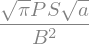

In [110]:
K_Ic = sigma_x * sp.sqrt( sp.pi * a)
K_Ic

In [111]:
beta = sp.Symbol(r'\beta', nonnegative = True)
eta = sp.Symbol(r'\eta', nonnegative = True)

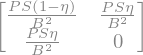

In [112]:
sigma_ij = sp.Matrix([[(1 - eta) * sigma_x, eta * sigma_x],
                    [ eta * sigma_x, 0]])
sigma_ij

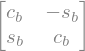

In [113]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

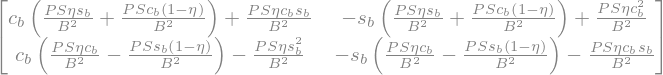

In [114]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

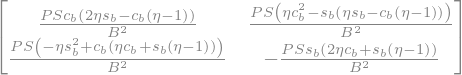

In [115]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

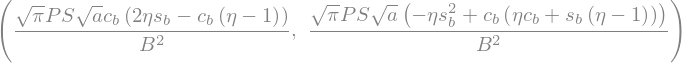

In [116]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

In [117]:
Norm_K_I = K_I / K_Ic
Norm_K_I_ = Norm_K_I.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta))
Norm_K_I_

In [118]:
get_Norm_K_I = sp.lambdify((eta, beta), Norm_K_I_, 'numpy')
get_Norm_K_I

<function _lambdifygenerated(Dummy_506, Dummy_507)>

In [119]:
Norm_K_II = K_II / K_Ic
Norm_K_II_ = (Norm_K_II.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
Norm_K_II_

In [120]:
get_Norm_K_II = sp.lambdify((eta, beta), Norm_K_II_, 'numpy')
get_Norm_K_II

<function _lambdifygenerated(Dummy_508, Dummy_509)>

In [121]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(-90 * np.pi/180, 90 * np.pi/180, 100)
K_I_K_Ic = get_Norm_K_I(eta_0, beta_)
K_II_K_Ic = get_Norm_K_II(eta_0, beta_)
K_I_K_Ic_ts = get_Norm_K_I(eta_05, beta_)
K_II_K_Ic_ts = get_Norm_K_II(eta_05, beta_)
K_I_K_Ic_ps = get_Norm_K_I(eta_1, beta_)
K_II_K_Ic_ps = get_Norm_K_II(eta_1, beta_)
ax1.plot(K_I_K_Ic, K_II_K_Ic, color='blue', lw=2, label = r'$Pure\,Tension$')
ax1.plot(K_I_K_Ic_ts, K_II_K_Ic_ts, color='red', lw=2, label = r'$Tension\,Shear$')
ax1.plot(K_I_K_Ic_ps, K_II_K_Ic_ps, color='green', lw=2, label = r'$Pure\,Shear$')
ax1.set_xlabel(r'$K_{If}/K_{Ic}$'); ax1.set_ylabel(r'$K_{IIf}/K_{Ic}$')
ax1.legend()
_.savefig("Failurelocus.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

## Variation Of SIFs against $\beta$

In [122]:
params = {sigma_x : 1, a : 1}
K_I_ = K_I.subs(params).subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta))
K_I_

In [123]:
K_II_ = (K_II.subs(params).subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
K_II_

In [124]:
get_K_I = sp.lambdify((eta, beta), K_I_, 'numpy')
get_K_I

<function _lambdifygenerated(Dummy_510, Dummy_511)>

In [125]:
get_K_II = sp.lambdify((eta, beta), K_II_, 'numpy')
get_K_II

<function _lambdifygenerated(Dummy_512, Dummy_513)>

In [126]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_I_pt = get_K_I(eta_0, beta_)
K_I_ts = get_K_I(eta_05, beta_)
K_I_ps = get_K_I(eta_1, beta_)
ax1.plot(beta_ * 180/np.pi, K_I_pt, color='blue', lw=2, label = r'$Pure\,Tension$')
ax1.plot(beta_ * 180/np.pi, K_I_ts, color='red', lw=2, label = r'$Tension\,Shear$')
ax1.plot(beta_ * 180/np.pi, K_I_ps, color='green', lw=2, label = r'$Pure\,Shear$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$K_{I}$')
ax1.legend()
_.savefig("KIbeta.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

In [127]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_II_pt = get_K_II(eta_0, beta_)
K_II_ts = get_K_II(eta_05, beta_)
K_II_ps = get_K_II(eta_1, beta_)
ax1.plot(beta_ * 180/np.pi, K_II_pt, color='blue', lw=2, label = r'$Pure\,Tension$')
ax1.plot(beta_ * 180/np.pi, K_II_ts, color='red', lw=2, label = r'$Tension\,Shear$')
ax1.plot(beta_ * 180/np.pi, K_II_ps, color='green', lw=2, label = r'$Pure\,Shear$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$K_{II}$')
ax1.legend()
_.savefig("KIIbeta.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>

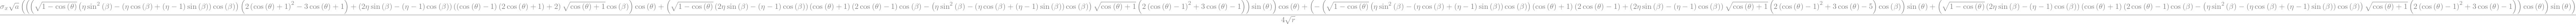

In [128]:
sigma_tip_ii = sig_tip_theta_ij_[0,0].subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)).subs(c_t, sp.cos(theta)).subs(s_t, sp.sin(theta))
sigma_tip_ii

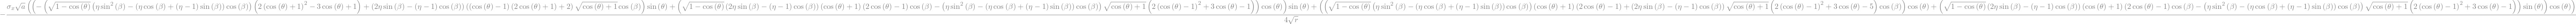

In [129]:
sigma_tip_jj = sig_tip_theta_ij_[1,1].subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)).subs(c_t, sp.cos(theta)).subs(s_t, sp.sin(theta))
sigma_tip_jj

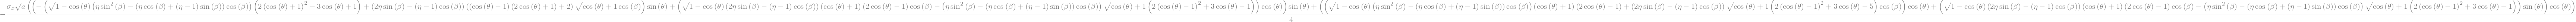

In [130]:
params_ = {sigma_x : 1, r : 1}
sig_tip_ii = sigma_tip_ii.subs(params_)
sig_tip_jj = sigma_tip_jj.subs(params_)
sig_tip_jj

In [131]:
get_sig_ii = sp.lambdify((a, eta, beta, theta), sig_tip_ii, 'numpy')
get_sig_ii

SyntaxError: unexpected character after line continuation character (<lambdifygenerated-13>, line 2)

In [ ]:
get_sig_jj = sp.lambdify((a, eta, beta, theta),sig_tip_jj, 'numpy')
get_sig_jj

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
a_ = 1
eta_pt = 0
eta_ts = 0.5
eta_ps = 1
beta_0_ts = np.linspace(0 * np.pi/180, 31.70 * np.pi/180, 20)
beta_1_ts = np.linspace(31.70 * np.pi/180, 90 * np.pi/180, 80)
beta_ts = np.concatenate((beta_0_ts, beta_1_ts))
#for beta_ in range(beta_ts):
theta_sig_pt_r = get_theta_sig_pt(beta_ts)
beta_0_ps = np.linspace(0 * np.pi/180, 45 * np.pi/180, 50)
beta_1_ps = np.linspace(45 * np.pi/180, 90 * np.pi/180, 50)
beta_ps = np.concatenate((beta_0_ps, beta_1_ps))
theta_sig_ps_1 = get_theta_sig_ps(beta_0_ps)
theta_sig_ps_2 = -get_theta_sig_ps(beta_1_ps)
#if beta_ps.any() == 45 * np.pi/180:
#theta_ps_0 = 0
theta_sig_ps_fin = np.concatenate((theta_sig_ps_1, theta_sig_ps_2)) #, theta_ps_0
theta_ts_1 = get_theta_sig_ts(beta_0_ts)
theta_ts_2 = -get_theta_sig_ts(beta_1_ts)
theta_sig_ts_fin = np.concatenate((theta_ts_1, theta_ts_2))
sig_ii_pt = get_sig_ii(a_, eta_pt, beta_ts, theta_sig_pt_r)
sig_ii_ts = get_sig_ii(a_, eta_ts, beta_ts, theta_sig_ts_fin)
sig_ii_ps = get_sig_ii(a_, eta_ps, beta_ps, theta_sig_ps_fin)
sig_jj_pt = get_sig_jj(a_, eta_pt, beta_ts, theta_sig_pt_r)
sig_jj_ts = get_sig_jj(a_, eta_ts, beta_ts, theta_sig_ts_fin)
sig_jj_ps = get_sig_jj(a_, eta_ps, beta_ps, theta_sig_ps_fin)
ax1.plot(beta_ts * 180/np.pi, sig_ii_pt, color='blue', lw=2, label = r'$\sigma_{\rho \rho}$')
ax1.plot(beta_ts * 180/np.pi, sig_ii_ts, color='red', lw=2, label = r'$\sigma_{\rho \rho}$')
ax1.plot(beta_ps * 180/np.pi, sig_ii_ps, color='green', lw=2, label = r'$\sigma_{\rho \rho}$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\sigma$')
ax1.legend()
#_.savefig("KIIbeta.pdf", bbox_inches='tight')
#sig_jj_pt

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
ax1.plot(beta_ts * 180/np.pi, sig_jj_pt, color='blue', lw=2, label = r'$\sigma_{\theta \theta}$')
ax1.plot(beta_ts * 180/np.pi, sig_jj_ts, color='red', lw=2, label = r'$\sigma_{\theta \theta}$')
ax1.plot(beta_ps * 180/np.pi, sig_jj_ps, color='green', lw=2, label = r'$\sigma_{\theta \theta}$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\sigma$')
ax1.legend()

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
a_ = np.linspace(0,1,10)
eta_pt = 0
eta_ts = 0.5
eta_ps = 1
#beta_0_ts = np.linspace(0 * np.pi/180, 31.70 * np.pi/180, 20)
#beta_1_ts = np.linspace(31.70 * np.pi/180, 90 * np.pi/180, 80)
#beta_ts = np.concatenate((beta_0_ts, beta_1_ts))
#for beta_ in range(beta_ts):
beta_ts = 0
theta_sig_pt_r = get_theta_sig_pt(beta_ts)
#beta_0_ps = np.linspace(0 * np.pi/180, 45 * np.pi/180, 50)
#beta_1_ps = np.linspace(45 * np.pi/180, 90 * np.pi/180, 50)
#beta_ps = np.concatenate((beta_0_ps, beta_1_ps))
beta_ps = 0
theta_sig_ps_1 = get_theta_sig_ps(beta_ps)
#theta_sig_ps_2 = -get_theta_sig_ps(beta_1_ps)
#if beta_ps.any() == 45 * np.pi/180:
#theta_ps_0 = 0
#theta_sig_ps_fin = np.concatenate((theta_sig_ps_1, theta_sig_ps_2)) #, theta_ps_0
theta_ts_1 = get_theta_sig_ts(beta_ts)
#theta_ts_2 = -get_theta_sig_ts(beta_1_ts)
#theta_sig_ts_fin = np.concatenate((theta_ts_1, theta_ts_2))
sig_ii_pt = get_sig_ii(a_, eta_pt, beta_ts, theta_sig_pt_r)
sig_ii_ts = get_sig_ii(a_, eta_pt, beta_ts, theta_ts_1)
sig_ii_ps = get_sig_ii(a_, eta_pt, beta_ps, theta_sig_ps_1)
sig_jj_pt = get_sig_jj(a_, eta_pt, beta_ts, theta_sig_pt_r)
sig_jj_ts = get_sig_jj(a_, eta_pt, beta_ts,  theta_ts_1)
sig_jj_ps = get_sig_jj(a_, eta_pt, beta_ps, theta_sig_ps_1)
ax1.plot(a_ , sig_ii_pt, color='blue', lw=2, label = r'$\sigma_{\rho \rho}$')
ax1.plot(a_ , sig_ii_ts, color='red', lw=2, label = r'$\sigma_{\rho \rho}$')
ax1.plot(a_ , sig_ii_ps, color='green', lw=2, label = r'$\sigma_{\rho \rho}$')
ax1.set_xlabel(r'$a$'); ax1.set_ylabel(r'$\sigma$')
ax1.legend()
#_.savefig("KIIbeta.pdf", bbox_inches='tight')
#sig_jj_pt

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
ax1.plot(a_ , sig_jj_pt, color='blue', lw=2, label = r'$\sigma_{\theta \theta}$')
ax1.plot(a_ , sig_jj_ts, color='red', lw=2, label = r'$\sigma_{\theta \theta}$')
ax1.plot(a_ , sig_jj_ps, color='green', lw=2, label = r'$\sigma_{\theta \theta}$')
ax1.set_xlabel(r'$a$'); ax1.set_ylabel(r'$\sigma$')
ax1.legend()

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
a_ = 1
eta_pt = 0
eta_ts = 0.5
eta_ps = 1
beta_0_ts = np.linspace(0 * np.pi/180, 31.70 * np.pi/180, 20)
beta_1_ts = np.linspace(31.70 * np.pi/180, 90 * np.pi/180, 80)
beta_ts = np.concatenate((beta_0_ts, beta_1_ts))
#for beta_ in range(beta_ts):
theta_sig_pt_r = get_theta_sig_pt(beta_ts)
beta_0_ps = np.linspace(0 * np.pi/180, 45 * np.pi/180, 50)
beta_1_ps = np.linspace(45 * np.pi/180, 90 * np.pi/180, 50)
beta_ps = np.concatenate((beta_0_ps, beta_1_ps))
theta_sig_ps_1 = get_theta_sig_ps(beta_0_ps)
theta_sig_ps_2 = -get_theta_sig_ps(beta_1_ps)
#if beta_ps.any() == 45 * np.pi/180:
#theta_ps_0 = 0
theta_sig_ps_fin = np.concatenate((theta_sig_ps_1, theta_sig_ps_2)) #, theta_ps_0
theta_ts_1 = get_theta_sig_ts(beta_0_ts)
theta_ts_2 = -get_theta_sig_ts(beta_1_ts)
theta_sig_ts_fin = np.concatenate((theta_ts_1, theta_ts_2))
sig_ii_pt = get_sig_ii(a_, eta_pt, beta_ts, theta_sig_pt_r)
sig_ii_ts = get_sig_ii(a_, eta_ts, beta_ts, theta_sig_ts_fin)
sig_ii_ps = get_sig_ii(a_, eta_ps, beta_ps, theta_sig_ps_fin)
sig_jj_pt = get_sig_jj(a_, eta_pt, beta_ts, theta_sig_pt_r)
sig_jj_ts = get_sig_jj(a_, eta_ts, beta_ts, theta_sig_ts_fin)
sig_jj_ps = get_sig_jj(a_, eta_ps, beta_ps, theta_sig_ps_fin)
ax1.plot(theta_sig_pt_r * 180/np.pi, sig_ii_pt, color='blue', lw=2, label = r'$\sigma_{\rho \rho}$')
ax1.plot(theta_sig_ts_fin * 180/np.pi, sig_ii_ts, color='red', lw=2, label = r'$\sigma_{\rho \rho}$')
ax1.plot(theta_sig_ps_fin * 180/np.pi, sig_ii_ps, color='green', lw=2, label = r'$\sigma_{\rho \rho}$')
ax1.set_xlabel(r'$\theta$'); ax1.set_ylabel(r'$\sigma$')
ax1.legend()
#_.savefig("KIIbeta.pdf", bbox_inches='tight')
#sig_jj_pt

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
ax1.plot(theta_sig_pt_r * 180/np.pi, sig_jj_pt, color='blue', lw=2, label = r'$\sigma_{\theta \theta}$')
ax1.plot(theta_sig_ts_fin * 180/np.pi, sig_jj_ts, color='red', lw=2, label = r'$\sigma_{\theta \theta}$')
ax1.plot(theta_sig_ps_fin * 180/np.pi, sig_jj_ps, color='green', lw=2, label = r'$\sigma_{\theta \theta}$')
ax1.set_xlabel(r'$\theta$'); ax1.set_ylabel(r'$\sigma$')
ax1.legend()

## R-Curve
The fracture of quasi-brittle materials can be depicted by an R-curve which is also termed as fracture resistance. R-Curve is an envelope of energy release rate. For quasi-brittle materials, R is an increasing and convex function. This curve may be dependent on specimen geometry and material. 
A figure shown below highlights that the convex envelope of R-curve serves as the limit for crack gorwth, beyond which the unstable crack grows.


<img src="Rcurve.png" width="500"/>

For an infinite size specimen, the energy release rate is given by:
\begin{gather*}
G = \frac{\sigma^2 \pi a f_1^2}{E}
\end{gather*}
where, $\sigma = \frac{Ps}{b^2}$ for three point bending beam, $a$, $E$ represent the crack length and the modulus of elasticity respectively. The term $f_1$ in $\alpha$ equation is a geometry factor for the stress intensity factor and its value is equal to 1.123 for three point beam.

In [ ]:
f_1 = sp.Symbol('f_1', nonnegative = True)
f_2 = sp.Symbol('f_2', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
alpha = sp.Symbol('alpha', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
a_c = sp.Symbol('a_c', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
P = sp.Symbol('P', nonnegative = True)
S = sp.Symbol('S', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
COD = sp.Symbol('COD', nonnegative = True)
K_Ic = sp.Symbol('K_{Ic}', nonnegative = True)

In [ ]:
params = {f_2 : 1.42, 
          E: 20000, #N/mm2
          P_max : 10, #N 
          D : 19, #mm
          H_0 : 3, #mm
          B : 76.2, #mm
          S : 304.8, #mm
          P : 120, #N
          pi : 3.14, 
          #a_0: 10, #mm
          f_1: 1.123,
          #COD : 0.0094, ##mm
          K_Ic : 31.4 #N/mm2
         }

In [ ]:
#sigma_x = (P * S) / B**2
#sigma_x_ = sigma_x.subs(params)
#sigma_x_

In [ ]:
#G = (sigma_x_ * pi * a * f_1**2)/E
#G

In [ ]:
#G_ = G.subs(params)
#G_

In [ ]:
#get_G = sp.lambdify((a), G_, 'numpy')
#get_G

With reference to Shah, the Crack Mouth Opening Displacement can be calculated as follows:
\begin{gather*}
CMOD = \frac{4 \sigma f_2}{E}
\end{gather*}

In [ ]:
CMOD = (4 * sigma_x.subs(params) * f_2.subs(params)) / E.subs(params)
CMOD

For the case, when critical crack mouth opening displacement $CMOD_c$ is known from experiment, the crack opening displacement $COD$ can be obtained from the equation given by Jenq and Shah:
\begin{gather*}
COD = CMOD_c\left[\left(1 - \frac{a_0}{a}\right)^2 + \left(1.081 - 1.149 \left(\frac{a}{D}\right)\right)\left[\frac{a_0}{a} - \left(\frac{a_0}{a}\right)^2\right]\right]^{1/2} 
\end{gather*}
In order to obtain the $COD_c$ at the tip of the crack we will replace $x$ with $a_0$. 

In [ ]:
COD = CMOD * sp.sqrt((alpha * a_0)**2 - a_0**2)
COD_ = COD.subs(params)
COD_

In [ ]:
#COD = CMOD * sp.sqrt((1 - a_0/a)**2 + (1.081 - 1.149*(a/D))*(a_0/a - (a_0/a)**2))
#COD_ = COD.subs(params)
#a_ = alpha * a_0
#COD_a = COD_.subs(a, a_)
#COD_a

In order to obtain R-Curve the following equation is to be evaluated:
\begin{gather*}
R = \beta_2 \psi (a - a_0)^{d_{2}}
\end{gather*}
The value of $\psi$ is normally close to one, hence it can be ignored whereas to calculate factor $\beta_2$ two critical conditions have to be considered i.e. $K_I = K_{IC}$ and $COD = CTOD_c$. Therefore, with reference to Maximum Tangential Stress Criterion $K_{IC}$ will be calculated as:
\begin{gather*}
K_{Ic} = \sigma_x \sqrt{\pi a}
\end{gather*}

In [ ]:
#K_Ic = sigma_x_ * sp.sqrt( sp.pi * a)
#K_Ic_ = K_Ic.subs(a, a_)
#K_Ic_

With reference to Shah, the value of $\beta_2$ can be calculated as:
\begin{gather*}
\beta_2 = \frac {K_{Ic}^2 (\alpha a_0 - a_0)^{-d_2}}{E \left(1 - \frac{d_2 - \frac{\alpha - 1}{\alpha}}{d_1 - \frac{\alpha - 1}{\alpha}} \right)}
\end{gather*}
and the unknown terms $\alpha$, $d_{1,2}$ in the above equation can be obtained from:
\begin{gather*}
\alpha = \frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + \sqrt {\frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + 1} \\
d_{1,2} = \frac{1}{2} + \frac{\alpha - 1} {\alpha} \pm \sqrt{\left(\frac{1}{4} + \frac{\alpha - 1} {\alpha} - \left(\frac{\alpha - 1} {\alpha}\right)^2\right)}
\end{gather*}
where, $f_2$ is a geometry parameter ad is equal to 1.42 for three point bend beam. $\alpha$ is the precritical stable crack growth ($\alpha \geq 1$). It is equal to 1 for a pure brittle material whereas it is greater than 1 for quasi-brittle materials. 

In [ ]:
alpha_ = (pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_sim = sp.simplify(alpha_.subs(params))
#alpha_val = alpha_sim - alpha
#alpha_diff = alpha_val.diff(alpha)
#get_alpha_val = sp.lambdify((alpha), alpha_val, 'numpy')
#alpha_val
alpha_

In [ ]:
alpha_0 = 1
a_0_ = 1
alpha_val = alpha_sim - alpha
alpha_val.subs(a_0, a_0_)

In [ ]:
import scipy.optimize as sc
alpha_calc = sc.newton(get_alpha_val, 1) #fprime = alpha_diff)
alpha_calc

In [ ]:
#Check
x = sp.Symbol('x')
f = x**2 - 4
get_f = sp.lambdify((x), f, 'numpy')
f_calc = sc.newton(get_f,6)
f_calc

In [ ]:
d_1 = (1/2) + ((alpha_calc - 1) / alpha_calc) + sp.sqrt(1/4 + (alpha_calc - 1) / alpha_calc - ((alpha_calc - 1) / alpha_calc)**2)
d_2 = (1/2) + ((alpha_calc - 1) / alpha_calc) - sp.sqrt(1/4 + (alpha_calc - 1) / alpha_calc - ((alpha_calc - 1) / alpha_calc)**2)
d_2, d_1

In [ ]:
beta_2 = (K_Ic**2 * (alpha_calc * a_0 - a_0)**(-d_2)) / (E * (1 - (d_2 - ((alpha_calc-1)/alpha_calc))\
                                                            /(d_1 - ((alpha_calc-1)/alpha_calc))))
beta_2_ = beta_2.subs(params)
beta_2_

In [ ]:
R = beta_2_ * (a - a_0)**d_2
R_ = R.subs(params)
sp.simplify(R_)
R_

In [ ]:
get_R = sp.lambdify((a), R_, 'numpy')
get_R

The value of R must not exceed its maximum value which is:
\begin{gather*}
R_{Ic} = \frac{K_{Ic}^2}{E}
\end{gather*}

In [ ]:
R_Ic = (K_Ic)**2 / E
#R_Ic_ =R_Ic.subs(a, a_c_).subs(params)
R_Ic_ = R_Ic.subs(params)
R_Ic_

In [ ]:
#get_R_Ic = sp.lambdify((s_b), R_Ic_, 'numpy')
#get_R_Ic

In [ ]:
alpha = sp.Symbol(r'\alpha', nonnegative = True)

In [ ]:
import scipy.optimize as sc
a_0_ = 12
H_ = 100
V_ = 60
H_crack = 20
V_crack = 0
beta_ = 0.78
alpha_0 = 1.00
#coordinates_pt = np.zeros((1,2))
#coordinates_pt = coordinates_pt[np.newaxis,:,:]
#new_coord = np.array([H_crack,V_crack]).reshape(1,2)
#new_coord = new_coord[np.newaxis,:,:]
#coordinates_pt = np.concatenate((coordinates_pt,new_coord))
if V_crack <= V_ or H_crack <= H_:
    alpha_val = alpha_sim - alpha
    alpha_subs = alpha_val.subs(a_0, a_0_)
    get_alpha_v = sp.lambdify((alpha), alpha_subs, 'numpy')
    alpha = sc.newton(get_alpha_v, alpha_0)
    a_0_ = alpha * a_0_
    print(a_0_)
    #alpha_0 = sc.newton(get_alpha_v, alpha_0)
    #a_0_ = alpha_calc * a_0_
    #V_crack += (a_0 * np.cos(beta_))
    #H_crack += (a_0 * np.sin(beta_)) 
    #print(get_alpha_val)
#if abs(V_crack) > H_ or H_crack > 60: #or V_crack < 0:# or i>15:
#    break

In [ ]:
sigma_x = (P * S) / B**2
sigma_x_ = sigma_x.subs(params)
sigma_x_

In [ ]:
alpha_ = (pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD_**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_sim = sp.simplify(alpha_.subs(params))
alpha_val = alpha_sim - alpha
alpha_diff = alpha_val.diff(alpha)
#alpha_val
alpha_val

In [ ]:
a_0_ = 1
H_ = 100
V_ = 100
H_crack = 20
V_crack = 0
beta_ = 0.78
E_ = 20000 #N/mm2
K_Ic_ = 31.4 #N/mm2
f_1 = 1.123
f_2 = 1.42
i = 0
#alpha_ans = []
coordinates_pt = np.zeros((1,2))
coordinates_pt = coordinates_pt[np.newaxis,:,:]
for i in range(10):
    alpha_0 = 1.00
    new_coord = np.array([H_crack,V_crack]).reshape(1,2)
    new_coord = new_coord[np.newaxis,:,:]
    coordinates_pt = np.concatenate((coordinates_pt,new_coord))
    V_crack += (a_0_)
    H_crack += (a_0_) * np.tan(beta_)
    #alpha_val = alpha_sim - alpha
    #alpha_diff = alpha_val.diff(alpha)
    alpha_n = alpha_0 - (alpha_val/alpha_diff)
    alpha_val = sp.solve(alpha_n.subs(a_0, a_0_))
    print('alpha_val =',alpha_val)
    if alpha_val[0] > 1:
        alpha_0 = alpha_val[0]
    elif alpha_val[0] < 1:
        alpha_0 = alpha_val[1]
    #print('alpha =',alpha_ans)
    #COD_val = COD_.subs(alpha, alpha_0).subs(a_0, a_0_).subs(E, E_)
    #d_1 = (1/2) + (( alpha_0 - 1) /  alpha_0) + sp.sqrt(1/4 + ( alpha_0 - 1) /  alpha_0\
    #                                     - (( alpha_0 - 1) /  alpha_0)**2)
    #d_2 = (1/2) + (( alpha_0 - 1) /  alpha_0) - sp.sqrt(1/4 + ( alpha_0 - 1) /  alpha_0 \
    #                                     - (( alpha_0 - 1) /  alpha_0)**2)
    #beta_2 = (K_Ic_**2 * ( alpha_0 * a_0_ - a_0_)**(-d_2)) / (E_ * (1 - (d_2 - (( alpha_0-1)/ alpha_0))\
    #                             /(d_1 - (( alpha_0-1)/ alpha_0))))
    #beta_2_ = beta_2.subs(E, E_).subs(K_Ic, K_Ic_)
    #psi = 1 - ((d_2 - ( alpha_0 - 1) /  alpha_0)/(d_1  - ( alpha_0 - 1) /  alpha_0)) * \
    #        ((alpha_0 * a_0_ - a_0_)/(alpha_0 * a_0_ - a_0_))**(d_2 - d_1)#- (alpha_ - 1)/alpha_)
    #R_ = R.subs(E, E_).subs(K_Ic, K_Ic_)
    #R =  beta_2_ * psi * ((alpha_ans * a_0_) - a_0_)**d_2
    #R = beta_2 * (( alpha_0 * a_0_) - a_0_)**d_2
    a_0_ =  alpha_0 * a_0_
    #alpha_0 = alpha_ans
    print('a_0=', a_0_)
    print('COD_val=', COD_val)
    print('V_crack=', V_crack)
    print('H_crack=', H_crack)
    print('beta_2 =', beta_2)
    print('d_1 =',d_1)
    print('d_2 =',d_2)
    print('psi =',psi)
    print('R =',R)
    print('alpha =',alpha_0)
    print('alpha_root =',alpha_val)
    print('*******************')
    i  += 1
    if abs(V_crack) > V_ or H_crack > H_: #or V_crack < 0:# or i>15:
        break